# Importing Data from Yahoo Finance

In [152]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm

In [153]:
# Define the stock ticker symbol (Marks and Spencer PLC in this case)
ticker_symbol = "MKS.L"

# Set the start and end dates for the data
end_date = '2023-11-30'
start_date = '2021-01-01'

# Download historical stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)


# Download historical stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
stock_data = stock_data['Adj Close'].round(4)
stock_data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date
2021-01-04    130.8849
2021-01-05    133.0763
2021-01-06    138.9532
2021-01-07    140.7959
2021-01-08    137.3594
                ...   
2023-11-23    248.8000
2023-11-24    248.8000
2023-11-27    249.6000
2023-11-28    252.1000
2023-11-29    253.6000
Name: Adj Close, Length: 734, dtype: float64

# Descriptive Statistics for Adjusted Closing Price

In [154]:
# Descriptive statistice for Adjusted Closing Price
stock_data.describe()

count    734.000000
mean     166.577896
std       37.891071
min       92.834600
25%      139.289350
50%      156.633600
75%      189.728300
max      255.892900
Name: Adj Close, dtype: float64

# Log Returns

In [155]:
# Computation of Log Returns
log_returns=np.log(stock_data/stock_data.shift(1))
log_returns

Date
2021-01-04         NaN
2021-01-05    0.016604
2021-01-06    0.043215
2021-01-07    0.013174
2021-01-08   -0.024710
                ...   
2023-11-23   -0.008804
2023-11-24    0.000000
2023-11-27    0.003210
2023-11-28    0.009966
2023-11-29    0.005932
Name: Adj Close, Length: 734, dtype: float64

# Descriptive Statistics for Log Returns

In [156]:
# Descriptive statistice for log returns
log_returns.describe()

count    733.000000
mean       0.000902
std        0.023435
min       -0.082351
25%       -0.012381
50%        0.000531
75%        0.012664
max        0.152570
Name: Adj Close, dtype: float64

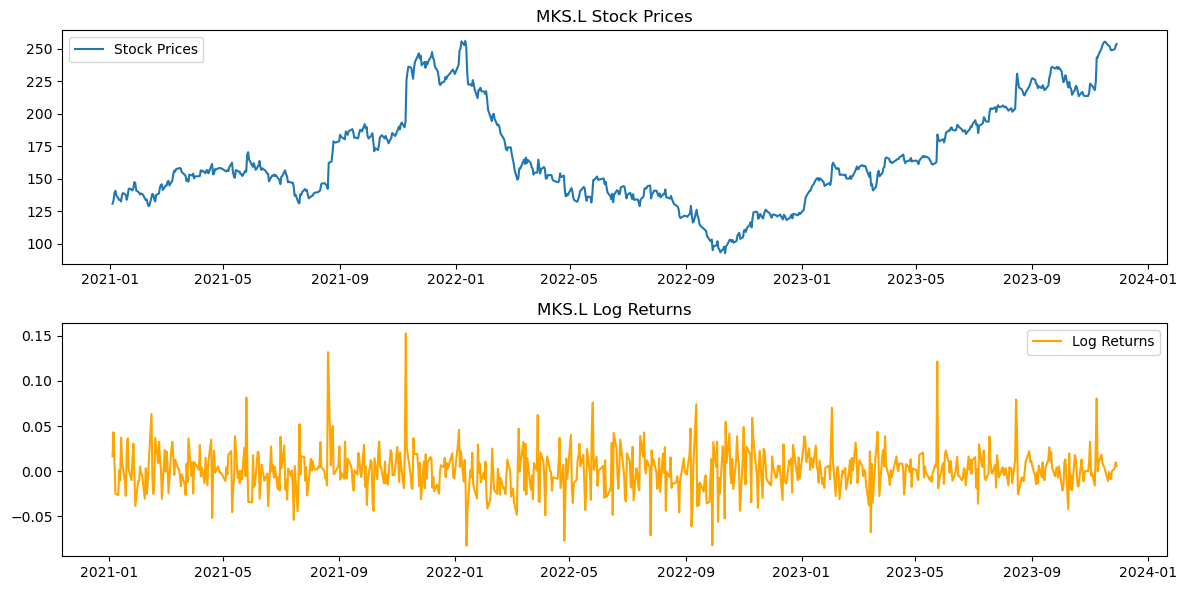

In [157]:
# Plot stock prices
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(stock_data, label='Stock Prices')
plt.title(f'{ticker_symbol} Stock Prices')
plt.legend()

# Plot log returns
plt.subplot(2, 1, 2)
plt.plot(log_returns, label='Log Returns', color='orange')
plt.title(f'{ticker_symbol} Log Returns')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Calculation of Annualised Volatility

In [158]:
#Calculated annualised volatility
num_years=2
num_days=504
annualised_log_return_=(1+log_returns.mean())**(1/num_years)-1
annualised_log_return_

0.0004510851039072339

In [159]:
daily_volaitlity=log_returns.std()
annualised_volatility=daily_volaitlity*np.sqrt(num_days/num_years)
print(daily_volaitlity)
print(annualised_volatility)

0.023435164631295597
0.3720217052895891


# Calculation of Risk-Free Rate and Volatility

In [264]:
# Assume a constant risk-free rate and volatility for simplicity (you may want to estimate these values more accurately)
risk_free_rate = 0.04  # 4% annual risk-free rate
volatility = 0.37  # 37% annual volatility

# Define the option parameters
strike_price = 300  # Example strike price
time_to_expiration = 1.0 
dividend_yield = 0.015  # Example dividend yield (you may want to adjust this)
stock_price=stock_data.iloc[-1]
stock_price

253.6

# Calculation of Spot Price

In [265]:
ms = yf.Ticker("MKS.L")
ms_data = ms.history(period="1d")
spot_price = ms_data['Close'].iloc[-1]
print(spot_price)

253.5


# Black-Scholes-Merton

In [298]:
from scipy.stats import norm
import numpy as np

def black_scholes_merton_put(stock_price, strike_price, time_to_expiration, risk_free_rate, volatility):
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_expiration) / (volatility * np.sqrt(time_to_expiration))
    d2 = d1 - volatility * np.sqrt(time_to_expiration)
    
    put_price = strike_price * np.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)
    
    return put_price

# Assume constant risk-free rate and volatility
risk_free_rate = 0.04
annualised_volatility = 0.37

# Option parameters
strike_price =300
time_to_expiration = 1.0  # In years
stock_price = stock_data.iloc[-1]  # Use the last stock price

# Calculate put price using Black-Scholes-Merton formula
put_price = black_scholes_merton_put(stock_price, strike_price, time_to_expiration, risk_free_rate, annualised_volatility)

print("Put price:", put_price)

Put price: 59.4074637153314


# Monte-Carlo Simulation 

In [215]:
def monte_carlo(number):
    
    time_frame=int(12*time_to_expiration)
    dt= time_to_expiration/time_frame

    st_stock=np.zeros((time_frame+1,number))
    st_stock[0]=stock_price
    rn=np.random.standard_normal(st_stock.shape)

    for t in range(1,time_frame+1):
        st_stock[t]=st_stock[t-1]*np.exp((risk_free_rate-volatility**2/2)*dt+volatility*np.sqrt(dt) *rn[t])
        
    return st_stock

simulated_stocks=monte_carlo(1000)
simulated_stocks

array([[253.6       , 253.6       , 253.6       , ..., 253.6       ,
        253.6       , 253.6       ],
       [241.54103947, 241.55116045, 271.82150253, ..., 313.72531651,
        277.63356239, 283.1466105 ],
       [244.16427528, 232.49601487, 259.46493631, ..., 303.77958642,
        226.20307333, 245.69833662],
       ...,
       [383.00872365, 170.22893424, 353.14525256, ..., 412.88928039,
        130.11960371, 228.26967773],
       [386.71495834, 159.97876349, 307.91452019, ..., 432.11304524,
        124.90816849, 205.97833532],
       [399.58688123, 155.51070027, 283.44323494, ..., 554.78941222,
        138.33717193, 184.04339538]])

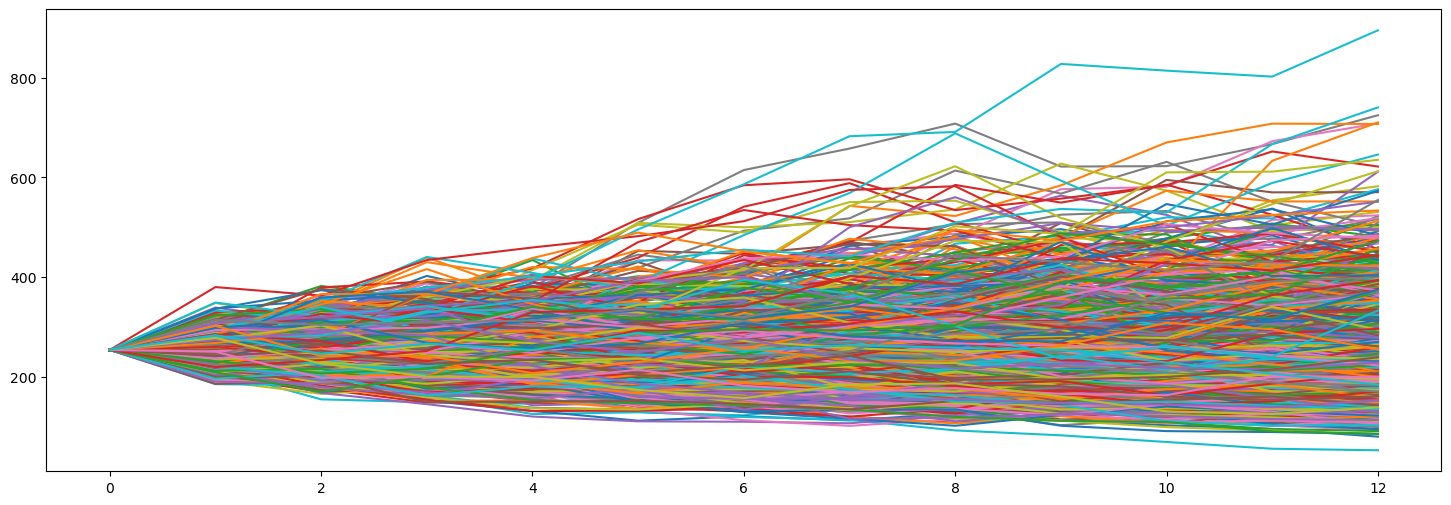

In [216]:
fig = plt.figure(figsize=(18,6))
plt.plot(simulated_stocks)
plt.show()

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

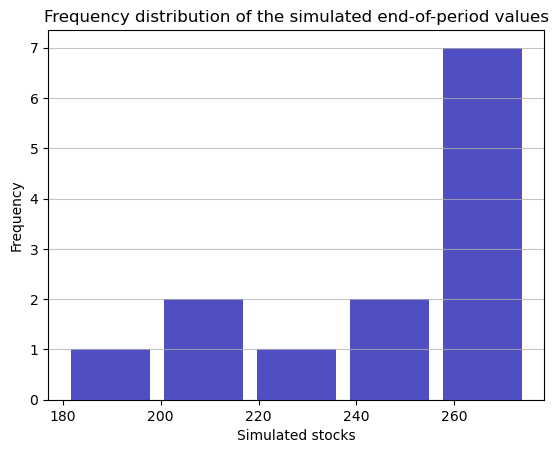

In [220]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=simulated_stocks[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Simulated stocks')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [336]:
import numpy as np

def monte_carlo(number):
   time_frame=int(12*time_to_expiration)
   dt= time_to_expiration/time_frame

   st_stock=np.zeros((time_frame+1,number)) 
   st_stock[0]=stock_price
   
   for t in range(1,time_frame+1):
       st_stock[t]=st_stock[t-1]*np.exp((risk_free_rate-annualised_volatility**2/2)*dt+annualised_volatility*np.sqrt(dt) * np.random.standard_normal(size=number)) 
       
   return st_stock
   
# Call monte carlo simulation   
simulated_stocks = monte_carlo(1000) 

strike_price = 300
time_to_expiration = 1

payoffs = np.maximum(strike_price - simulated_stocks[-1,:], 0)   

df = np.exp(-risk_free_rate * time_to_expiration)   

price = df * payoffs.mean() 

print("European Put Option Price: ", round(price, 3))

European Put Option Price:  61.479


# Greeks

# Delta

In [228]:
from scipy.stats import norm
import numpy as np

def delta(stock_price, strike_price, time_to_expiration, risk_free_rate, annualised_volatility, payoff):
    
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.4 * annualised_volatility ** 2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))
    delta = norm.cdf(d1, 0.0, 1.0) - 1
    
    return delta

# Example usage for a put option with a strike price of 200
stock_price = 254
strike_price_put = 300 # Updated strike price
time_to_expiration = 1.0
risk_free_rate = 0.04
annualised_volatility = 0.30

put_delta = delta(stock_price, strike_price_put, time_to_expiration, risk_free_rate, annualised_volatility, payoff="put")
print("Put Delta:", put_delta)

Put Delta: -0.6184810974070756


In [230]:
S = np.linspace(50,150,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 100, 1, 0.05, 0.25, 'put')

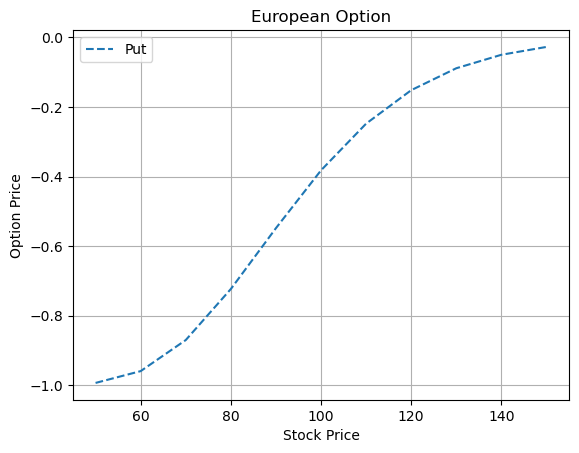

In [231]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

# Gamma 

In [233]:
import scipy.stats as si

def gamma(Stock_price, strike_price, time_to_expiration, risk_free_rate,  annualised_volatility, payoff):
    
    d1 = (np.log(Stock_price / strike_price) + (risk_free_rate  + 0.4 * annualised_volatility ** 2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (annualised_volatility *  np.sqrt(time_to_expiration) * stock_price)
    return gamma

In [232]:
gamma(254, 300, 1.0, 0.04, 0.30, 'put')

0.0050028410416314475

In [234]:
S = np.linspace(50,150,11)
gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    gamma_Put [i] = gamma(S[i], 100, 1, 0.05, 0.25, 'put')

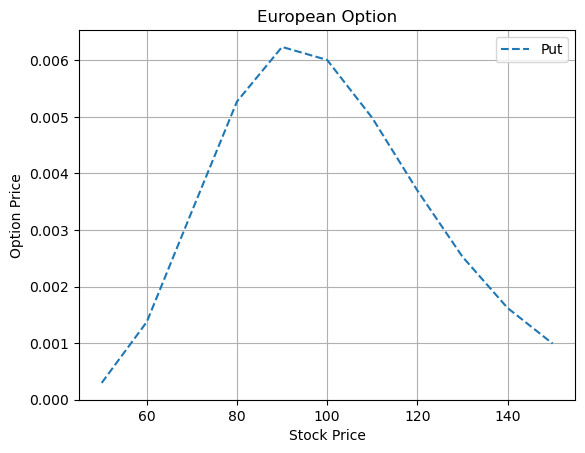

In [235]:
fig = plt.figure()
plt.plot(S, gamma_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

# Theta

In [236]:
def theta(Stock_price, strike_price, time_to_expiration, risk_free_rate, annualised_volatility, payoff):
    d1 = (np.log(Stock_price / strike_price) + (risk_free_rate + 0.4 * annualised_volatility ** 2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))
    d2 = (np.log(Stock_price / strike_price) + (risk_free_rate - 0.4 * annualised_volatility ** 2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    theta = - Stock_price * N_d1_prime * annualised_volatility / (2 * np.sqrt(time_to_expiration)) + risk_free_rate * strike_price * np.exp(-risk_free_rate * time_to_expiration) * si.norm.cdf(-d2, 0.0, 1.0)
    return theta

In [237]:
theta(254, 300, 1.0, 0.04, 0.30, 'put')

-6.385503411929276

In [239]:
S = np.linspace(50,150,11)
theta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    theta_Put[i] = theta(S[i], 100, 1, 0.05, 0.25, 'put')

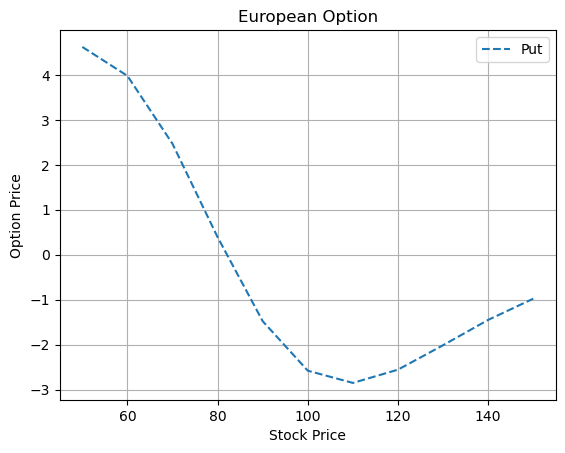

In [200]:
fig = plt.figure()
plt.plot(S, theta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

# RHO

In [194]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [240]:
rho(254, 300, 1.0, 0.04, 0.30, 'put')

-206.4258787113263

In [242]:
S = np.linspace(50,150,11)
rho_Put = np.zeros((len(S),1))
for i in range(len(S)):
    rho_Put[i] = rho(S[i], 100, 1, 0.05, 0.25, 'put')